# Projeto de Predição de Temperatura
---

## 1. Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



## 2. Carregamento dos dados

In [ ]:
path = "../data/raw/nasa_rio_vermelho.csv"
df = pd.read_csv(path, skiprows=26)  # a NASA inclui 26 linhas de metadados
df.head()



,YEAR,DOY,T2M,RH2M,PRECTOTCORR,WS2M,ALLSKY_SFC_SW_DWN
0,2020,1,25.97,87.48,2.92,5.24,19.97
1,2020,2,25.07,84.72,10.36,8.34,17.31
2,2020,3,24.60,80.82,3.49,8.01,24.51
3,2020,4,24.51,81.58,3.91,6.56,12.47
4,2020,5,24.62,80.98,0.66,3.83,27.13


parameter(s): 

- DOY: day of the yeas
- T2M: MERRA-2 Temperature at 2 Meters (C) 
- RH2M: MERRA-2 Relative Humidity at 2 Meters (%) 
- PRECTOTCORR: MERRA-2 Precipitation Corrected (mm/day) 
- WS2M: MERRA-2 Wind Speed at 2 Meters (m/s) 
- ALLSKY_SFC_SW_DWN: CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (MJ/m^2/day) 

## 3. Limpeza e renomeação


In [ ]:
# Remover espaços em branco dos nomes das colunas (se houver)
df.columns = df.columns.str.strip()

# Converter DOY em data
df["data"] = pd.to_datetime(df["YEAR"].astype(str), format="%Y") + pd.to_timedelta(df["DOY"] - 1, unit="D")

# Definir como índice
df = df.set_index("data")


df.head()

,YEAR,DOY,T2M,RH2M,PRECTOTCORR,WS2M,ALLSKY_SFC_SW_DWN
data,,,,,,,
2020-01-01,2020,1,25.97,87.48,2.92,5.24,19.97
2020-01-02,2020,2,25.07,84.72,10.36,8.34,17.31
2020-01-03,2020,3,24.60,80.82,3.49,8.01,24.51
2020-01-04,2020,4,24.51,81.58,3.91,6.56,12.47
2020-01-05,2020,5,24.62,80.98,0.66,3.83,27.13


## 4. Conversão de variáveis


In [6]:
df = df.apply(pd.to_numeric, errors="coerce")

## 5. Visualizações iniciais


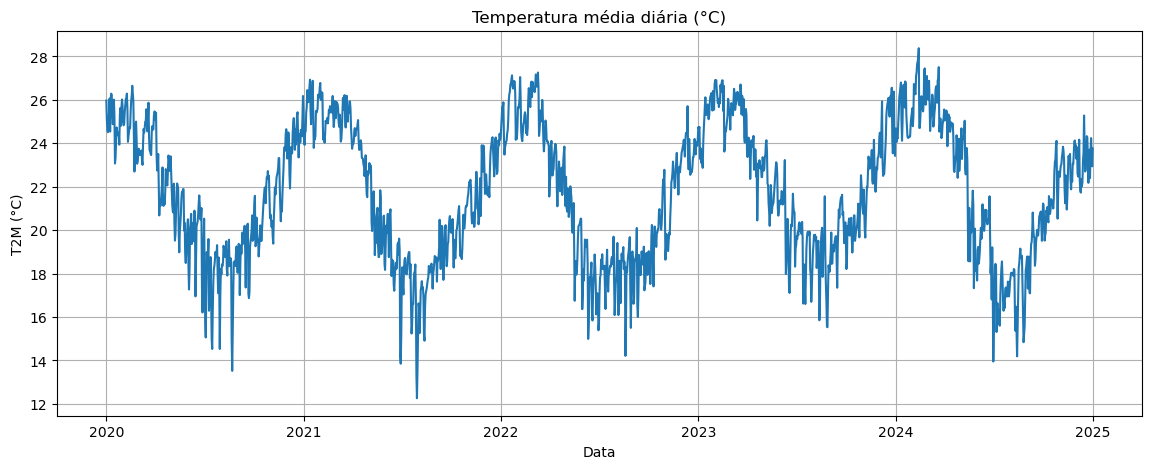

In [7]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df["T2M"])
plt.title("Temperatura média diária (°C)")
plt.ylabel("T2M (°C)")
plt.xlabel("Data")
plt.grid(True)
plt.show()